<a href="https://colab.research.google.com/github/SalsaRaishaP/Tugas_Python/blob/main/TugasPyhtonSalsaRaisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
cd/content/drive/MyDrive

/content/drive/MyDrive


In [53]:
ls

'111_Salsa Raisha (1).pdf'
'111_Salsa Raisha.pdf'
 3scene@
 astrsk.jpeg
 audio_only.m4a
'bukti ksm.jpeg'
 CertExchangeSalsaRaisha.fdf
 Classroom/
'Colab Notebooks'/
 filter.pdf
'Getting started.pdf'
'JURNAL MODUL 4_111_SalsaRaisha.pdf'
 Kuis3_MRV_SalsaRaisha_1101193453.pdf
 nnmodel_scene/
'no 10 matvek kuis 2 salsaraisha (tt12).pdf'
'no 11 kuis matvek salsaraisha(tt-43-12).pdf'
'no 12 matvek kuis 2 pertemuan 1 salsa (t.pdf'
'no 13 matvek salsa kuis 2.pdf'
'no 14 matvek kuis 2.pdf'
'no 6 matvek kuis 2 (salsa raisha 1101193.pdf'
'no 8 matvek kuis 2.pdf'
'no 9 matvek kuis 2 salsaraisha tt12.pdf'
 norton.pdf
 pantai.jpeg
'paralel 1.jpeg'
'respon fasa.pdf'
'rumus b.PNG'
'Salsa Raisha_1101193453_111_compressed.pdf'
'SALSA RAISHA ISPUTRI ANSOR_1101193453_11.pdf'
'seri 1.jpeg'
 thevenin.pdf
'TUGAS DASAR ARRAY (20 Mar 2020 07.22)'
'TUGAS DASAR ARRAY (20 Mar 2020 07.24)'
'TUGAS DASAR ARRAY (20 Mar 2020 07.25)'
'TUGAS DASAR ARRAY (20 Mar 2020 07.27)'
'TUGAS DASAR ARRAY (20 Mar 2020 07.28)'
'TUGAS

In [29]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [54]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [55]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [56]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [57]:
#encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [58]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [59]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [60]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(150, activation="relu", name="layer1"),
        Dense(64, activation="relu", name="layer2"),
        Dense(64, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 150)               1843350   
_________________________________________________________________
layer2 (Dense)               (None, 64)                9664      
_________________________________________________________________
layer3 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 195       
Total params: 1,857,369
Trainable params: 1,857,369
Non-trainable params: 0
_________________________________________________________________


In [62]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 0s 21ms/step - loss: 1.1547 - accuracy: 0.4374 - val_loss: 0.9718 - val_accuracy: 0.4937
Epoch 2/25
23/23 [==============================] - 0s 16ms/step - loss: 0.9369 - accuracy: 0.5457 - val_loss: 0.9451 - val_accuracy: 0.5949
Epoch 3/25
23/23 [==============================] - 0s 16ms/step - loss: 0.7926 - accuracy: 0.6681 - val_loss: 0.8930 - val_accuracy: 0.6118
Epoch 4/25
23/23 [==============================] - 0s 16ms/step - loss: 0.7095 - accuracy: 0.7201 - val_loss: 0.7850 - val_accuracy: 0.6835
Epoch 5/25
23/23 [==============================] - 0s 16ms/step - loss: 0.6821 - accuracy: 0.7075 - val_loss: 0.7254 - val_accuracy: 0.6793
Epoch 6/25
23/23 [==============================] - 0s 16ms/step - loss: 0.5973 - accuracy: 0.7553 - val_loss: 0.7012 - val_accuracy: 0.7046
Epoch 7/25
23/23 [==============================] - 0s 16ms/step - loss: 0.5422 - accuracy: 0.7862 - val_loss: 1.2822 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


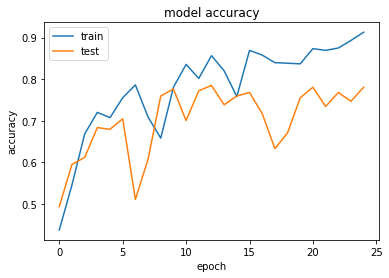

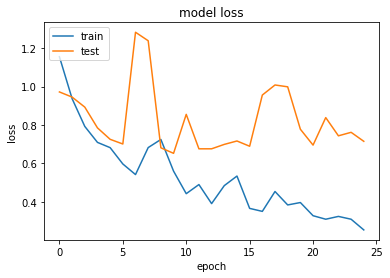

In [63]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.78      0.81      0.79        88
      forest       0.91      0.70      0.79        83
     highway       0.68      0.85      0.76        66

    accuracy                           0.78       237
   macro avg       0.79      0.78      0.78       237
weighted avg       0.80      0.78      0.78       237



In [65]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [69]:
import cv2
import matplotlib.pyplot as plt
image1='pantai.jpg'

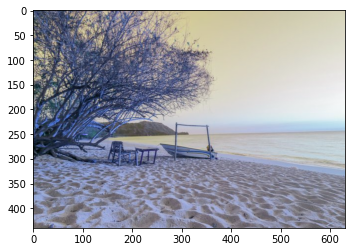

In [71]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [73]:
image_testing = Image.open('pantai.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [77]:

image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 1, 64, 64, 3)


In [78]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.47715825 0.30779487 0.2150469 ]]
['coast']
